In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [4]:
df['category'] = wine.target
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  category  
0                          3.92   1065.0         0  
1                          3.40   1050.0         0  
2                          3.17   1185.0         0  
3                          3.45   1480.0         0  
4                          2.93    735.0         0

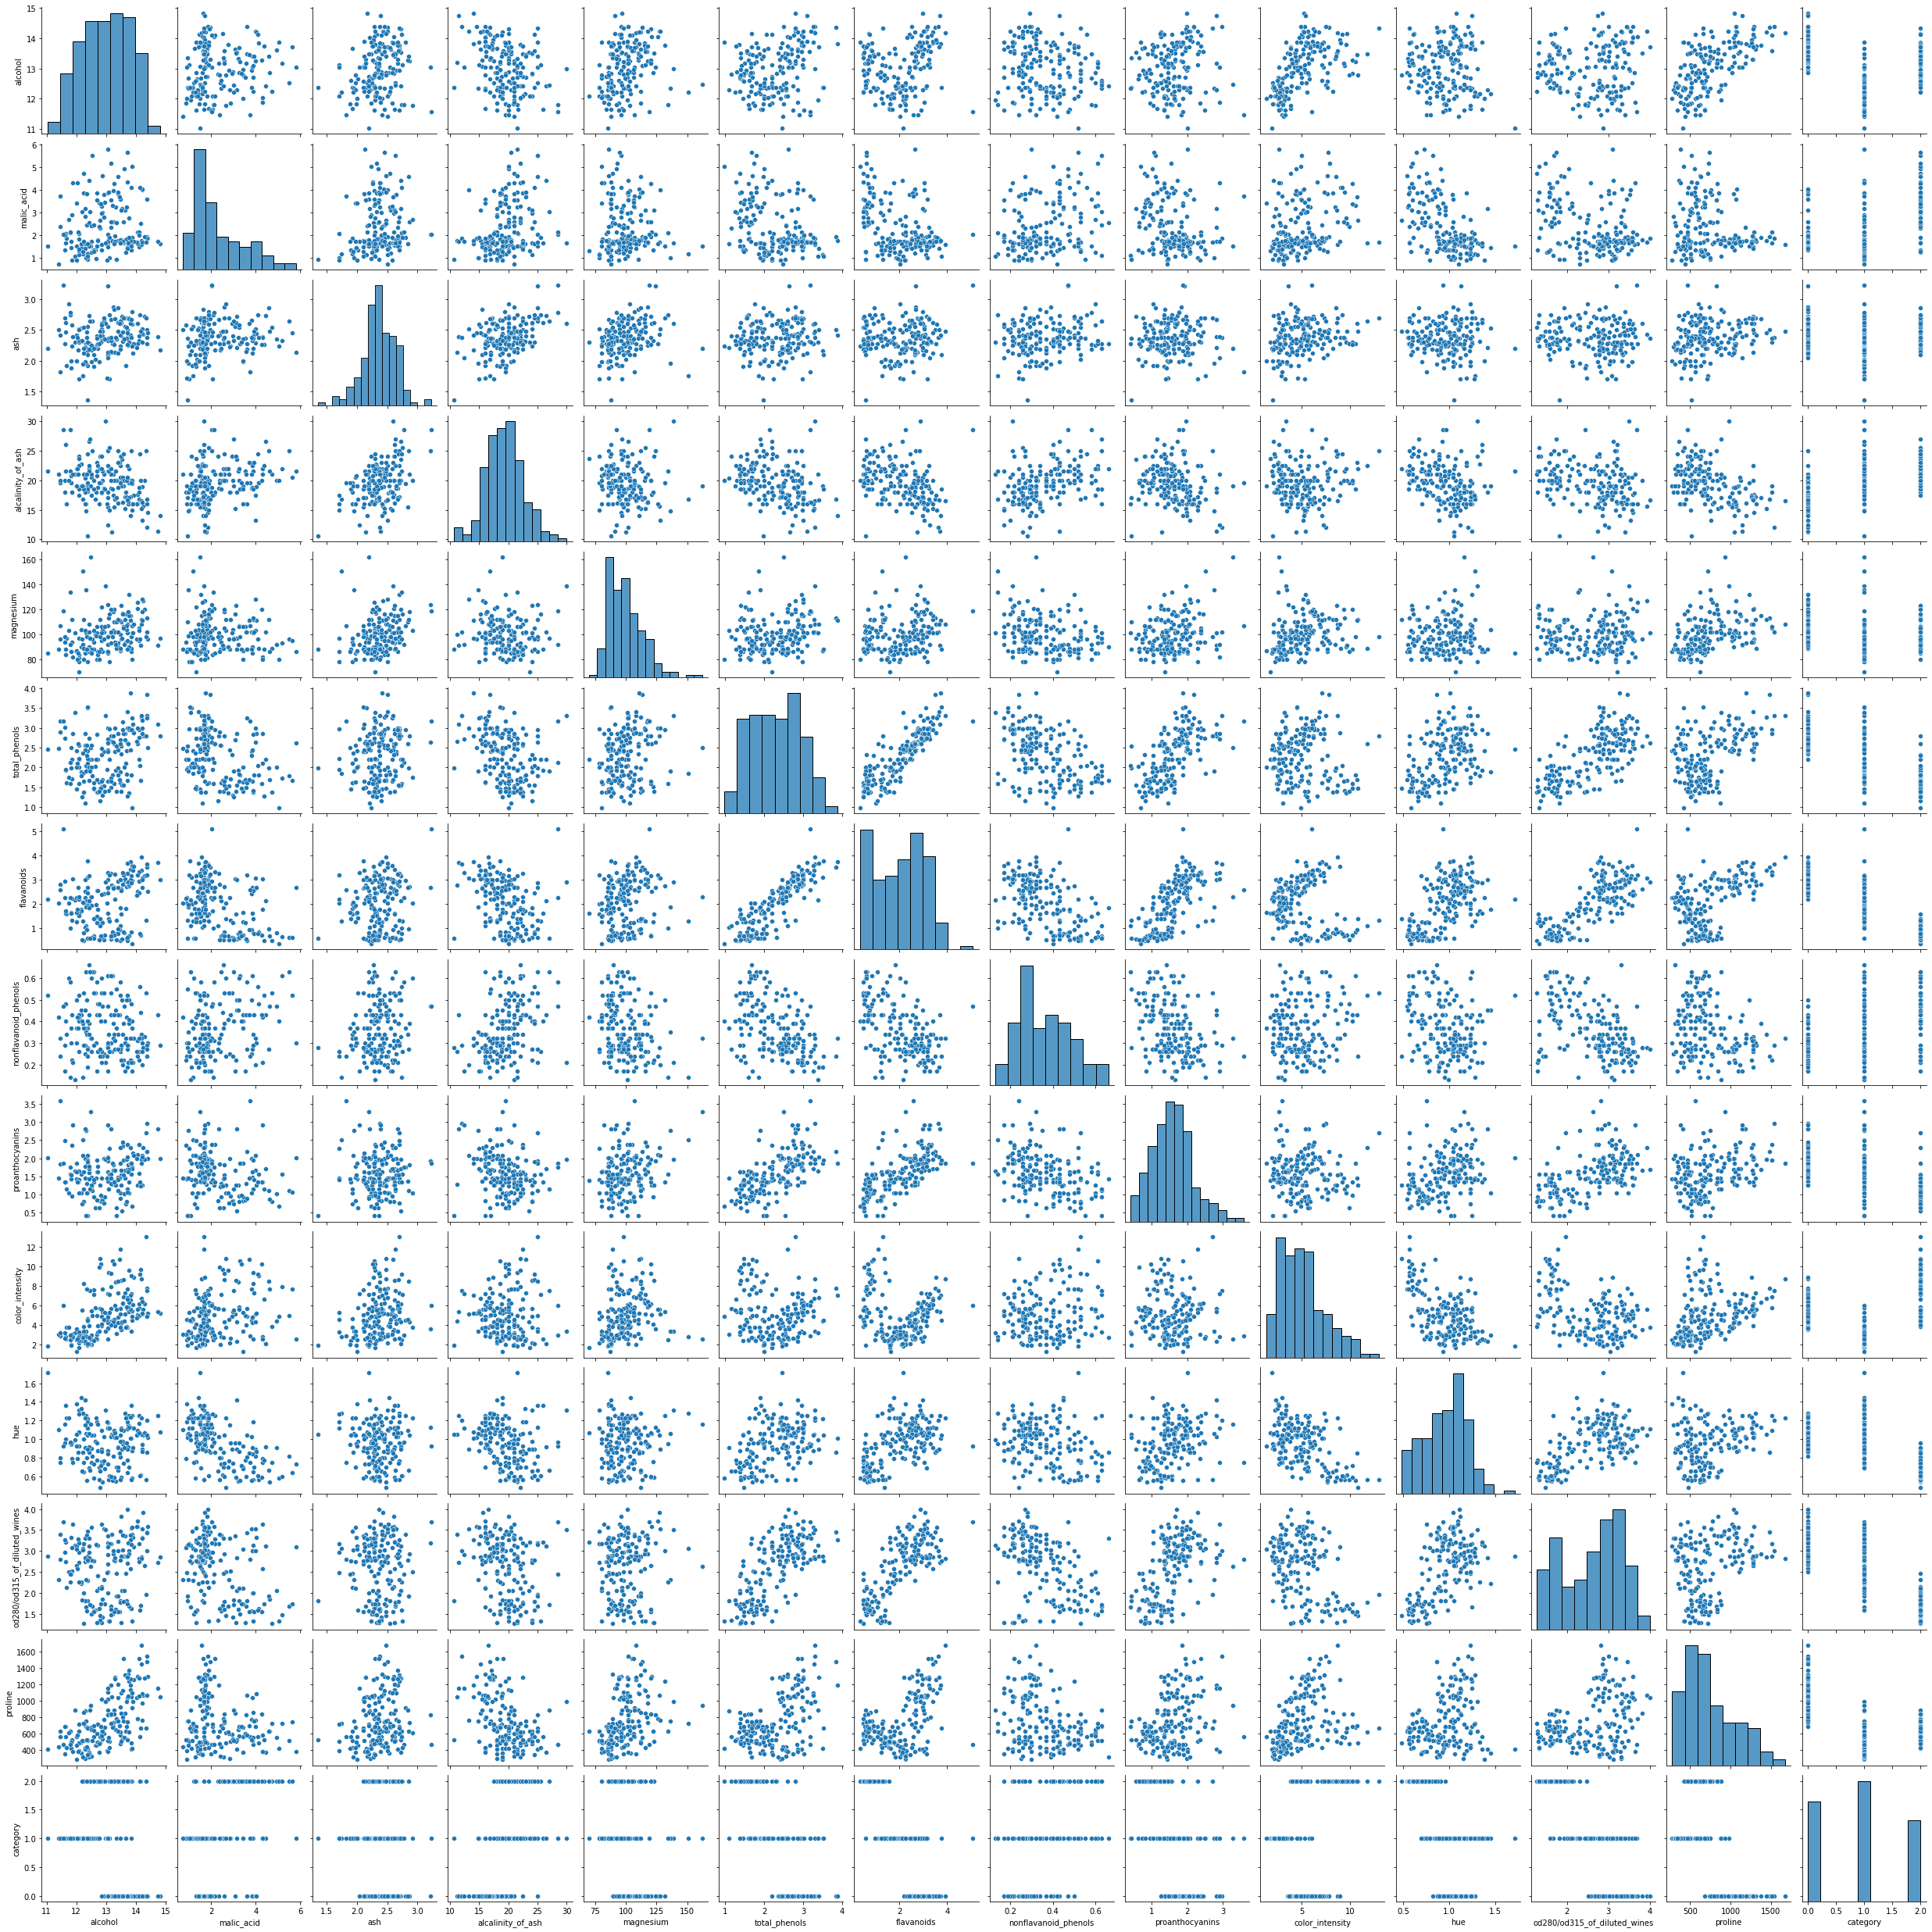

In [5]:
sns.pairplot(df)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=4)

In [29]:
x = wine.data
y = wine.target
px = pca.fit_transform(x)

In [30]:
trainx,testx,trainy,testy = train_test_split(px,y,test_size=.2,random_state=0)

In [31]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(trainx,trainy)

DecisionTreeClassifier(random_state=0)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [33]:
accuracy_score(testy,clf.predict(testx))*100

94.44444444444444

In [34]:
confusion_matrix(testy,clf.predict(testx))

array([[13,  1,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [35]:
print(classification_report(testy,clf.predict(testx)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.94      0.94      0.94        36



## prediction on normal data

In [43]:
from sklearn.preprocessing import StandardScaler

In [57]:
x = wine.data
y = wine.target
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
trainx,testx,trainy,testy = train_test_split(scaled_x,y,test_size=.2,random_state = 0)
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(trainx,trainy)
print('accuracy_score: ',accuracy_score(testy,clf1.predict(testx))*100)
print('confusion_matrix: \n',confusion_matrix(testy,clf1.predict(testx)))


accuracy_score:  97.22222222222221
confusion_matrix: 
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
